In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import norm
import math
import random

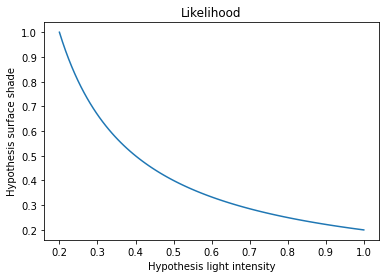

In [5]:
s_1 = np.linspace(0.2,1,100)
s_2 = 0.2/s_1
plt.plot(s_1,s_2)
plt.title("Likelihood")
plt.xlabel("Hypothesis light intensity")
plt.ylabel("Hypothesis surface shade")
plt.show()

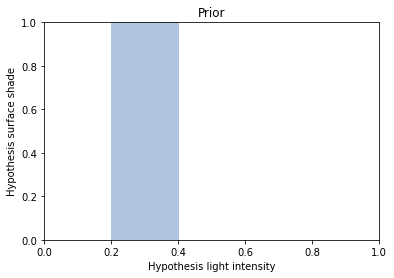

In [14]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
rect1 = matplotlib.patches.Rectangle((0.2, 0), 
                                     0.2, 1, 
                                     color ='lightsteelblue') 
ax.add_patch(rect1) 

plt.xlim([0,1]) 
plt.ylim([0,1]) 
plt.title("Prior")
plt.xlabel("Hypothesis light intensity")
plt.ylabel("Hypothesis surface shade")
plt.show() 

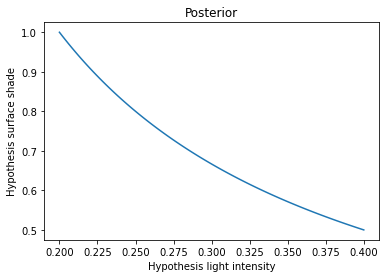

In [7]:
s_1 = np.linspace(0.2,0.4,100)
s_2 = 0.2/s_1
plt.plot(s_1,s_2)
plt.title("Posterior")
plt.xlabel("Hypothesis light intensity")
plt.ylabel("Hypothesis surface shade")
plt.show()

In [2]:
# values from paper
xlim = 10
list_x = np.linspace(-xlim,xlim,1000)
mu = 0
sigma_s = 2
sigma = 1
x_trial = 3

# a) Prior
# use pdf values from paper
prior = norm.pdf(list_x,mu,sigma_s)
#normalize
prior = prior / np.sum(prior)

# b) Likelihood
# use pdf values from paper
likelihood = norm.pdf(list_x,x_trial,sigma)
# normalize
likelihood = likelihood / np.sum(likelihood)

# c) Posterior
# use definition of posterior = prior * likelihood
posterior = prior * likelihood
# normalize
posterior = posterior / np.sum(posterior)


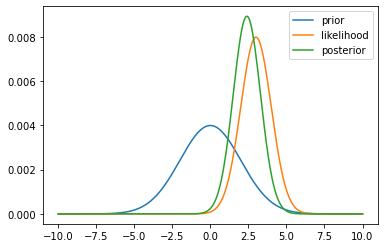

In [3]:
plt.plot(list_x,prior,label='prior')
plt.plot(list_x,likelihood,label='likelihood')
plt.plot(list_x,posterior,label='posterior')
plt.legend()

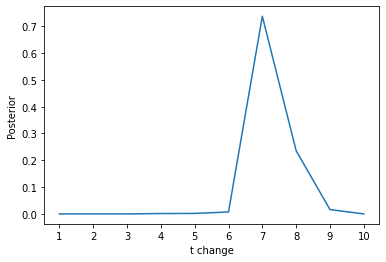

In [9]:
sigma=1
T=10
t_change = range(1,11)
x = [-0.46,0.83,-3.26, -0.14,-0.68,-2.31,0.57,1.34,4.58,3.77]

posterior = [math.exp((2/sigma**2) * np.sum(x[(t-1):(T-1)])) for t in t_change]
posterior = posterior/np.sum(posterior)
plt.plot(t_change,posterior)
plt.xticks(range(1,T+1,1))
plt.xlabel("t change")
plt.ylabel("Posterior")
plt.show()

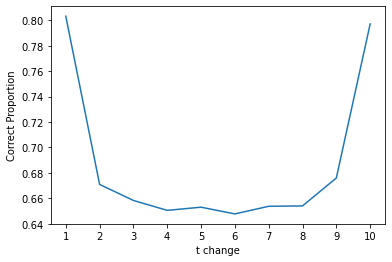

In [57]:

sigma=1
T=10
t_change = range(1,11)
trials = int(1e4)
correct_proportion = np.zeros(T)

for t in t_change:
    num_correct = 0
    for i in range(trials):
        s = np.array([1 if t_bis>= t else -1 for t_bis in t_change])
        x = np.array([np.random.normal(s[t_bis], sigma, 1) for t_bis in range(T)])
        posterior = np.array([sum(x[t_bis:]) for t_bis in range(T)])
        t_pred = np.argmax(posterior)+1
        num_correct+= 1 if t_pred == t else 0
    correct_proportion[t-1] = num_correct / trials
    
    
plt.plot(t_change, correct_proportion)
plt.xticks(t_change)
plt.xlabel("t change")
plt.ylabel("Correct Proportion")
plt.show()

In [58]:
correct_proportion.mean()

0.6864600000000001

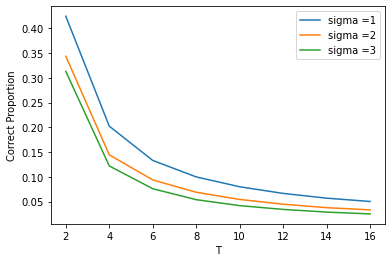

In [56]:
trials = int(1e4)
sigmas = [1,2,3]
Ts = range(2,17,2)
t_change = range(1,11)
for sigma in sigmas:
    correct_proportion = np.zeros(len(Ts))
    for T, iter_ in zip(Ts,range(len(Ts))):
        for t in range(1,T+1):
            num_correct = 0
            for i in range(trials):
                s = np.array([1 if t_bis>= t else -1 for t_bis in range(1,T+1)])
                x = np.array([np.random.normal(s[t_bis], sigma, 1) for t_bis in range(T)])
                posterior = np.array([sum(x[t_bis:]) for t_bis in range(T)])
                t_pred = np.argmax(posterior)+1
                num_correct+= 1 if t_pred == t else 0
                
            correct_proportion[iter_] = num_correct / trials
            
        correct_proportion[iter_] /= T
        
    plt.plot(Ts, correct_proportion, label="sigma =" +str(sigma))
plt.xlabel('T')
plt.ylabel('Correct Proportion')
plt.legend()
plt.show()